In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/cs444-final-project/project/data/small_data/train.zip


In [ ]:
!unzip /content/drive/MyDrive/cs444-final-project/project/data/small_data/test.zip

In [ ]:
import torch
import torchvision.models as models
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from dataset import LandmarkImageDataset
from utils import train, evaluate_model, plot_metrics, save_metrics
from config import *

In [ ]:
# Define transformations for the training data
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define transformations for the validation data using the same settings as training
test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Create instances of the dataset
train_dataset = LandmarkImageDataset(
    annotations_file=label_csv,
    transform=train_transform,
    id_path_mapping=train_img_id_to_path_mapping
)
test_dataset = LandmarkImageDataset(
    annotations_file=label_csv,
    transform=test_transform,
    id_path_mapping=test_img_id_to_path_mapping
)

In [ ]:
# Define the DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [ ]:
# Load the pretrained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)

# Replace the classifier layer with a new one adapted to our task
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(in_features=model.classifier[1].in_features, out_features=NUM_CLASSES)
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 176MB/s]


In [ ]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=len(train_loader) * NUM_EPOCHS, eta_min=1e-6)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
path_to_save_model = '/content/drive/MyDrive/cs444-final-project/project/models/baselines/saved_models/MobileNetV2_best_model.pth'
train_loss, train_gap, train_accuracy = train(model, train_loader, loss_fn, optimizer, scheduler, device, path_to_save_model, NUM_EPOCHS)

Epoch 1/25:   0%|          | 0/421 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 1/25 - Batch 421/421 - Loss: 1.6997 (Avg: 1.8823) - GAP score: 0.5266 (Avg: 0.3704) - Accuracy: 63.64% (Avg: 46.20%) - LR: 0.000996: 100%|██████████| 421/421 [00:29<00:00, 14.49it/s]


Saved new best model with avg GAP: 0.3704
      ==== GAP score in epoch 1: 0.3704 ===


Epoch 2/25 - Batch 421/421 - Loss: 1.5123 (Avg: 1.5195) - GAP score: 0.4227 (Avg: 0.4688) - Accuracy: 54.55% (Avg: 55.18%) - LR: 0.000984: 100%|██████████| 421/421 [00:27<00:00, 15.56it/s]


Saved new best model with avg GAP: 0.4688
      ==== GAP score in epoch 2: 0.4688 ===


Epoch 3/25 - Batch 421/421 - Loss: 1.8468 (Avg: 1.3558) - GAP score: 0.5372 (Avg: 0.5247) - Accuracy: 63.64% (Avg: 60.24%) - LR: 0.000965: 100%|██████████| 421/421 [00:27<00:00, 15.52it/s]


Saved new best model with avg GAP: 0.5247
      ==== GAP score in epoch 3: 0.5247 ===


Epoch 4/25 - Batch 421/421 - Loss: 1.1686 (Avg: 1.2306) - GAP score: 0.4616 (Avg: 0.5596) - Accuracy: 63.64% (Avg: 63.41%) - LR: 0.000938: 100%|██████████| 421/421 [00:26<00:00, 15.71it/s]


Saved new best model with avg GAP: 0.5596
      ==== GAP score in epoch 4: 0.5596 ===


Epoch 5/25 - Batch 421/421 - Loss: 0.9911 (Avg: 1.1461) - GAP score: 0.6120 (Avg: 0.5932) - Accuracy: 63.64% (Avg: 65.79%) - LR: 0.000905: 100%|██████████| 421/421 [00:27<00:00, 15.53it/s]


Saved new best model with avg GAP: 0.5932
      ==== GAP score in epoch 5: 0.5932 ===


Epoch 6/25 - Batch 421/421 - Loss: 2.3255 (Avg: 1.0662) - GAP score: 0.3519 (Avg: 0.6147) - Accuracy: 45.45% (Avg: 67.88%) - LR: 0.000865: 100%|██████████| 421/421 [00:27<00:00, 15.31it/s]


Saved new best model with avg GAP: 0.6147
      ==== GAP score in epoch 6: 0.6147 ===


Epoch 7/25 - Batch 421/421 - Loss: 0.4351 (Avg: 0.9915) - GAP score: 0.9091 (Avg: 0.6401) - Accuracy: 90.91% (Avg: 69.48%) - LR: 0.000819: 100%|██████████| 421/421 [00:26<00:00, 15.67it/s]


Saved new best model with avg GAP: 0.6401
      ==== GAP score in epoch 7: 0.6401 ===


Epoch 8/25 - Batch 421/421 - Loss: 0.5392 (Avg: 0.9062) - GAP score: 0.7440 (Avg: 0.6642) - Accuracy: 81.82% (Avg: 71.65%) - LR: 0.000768: 100%|██████████| 421/421 [00:26<00:00, 15.68it/s]


Saved new best model with avg GAP: 0.6642
      ==== GAP score in epoch 8: 0.6642 ===


Epoch 9/25 - Batch 421/421 - Loss: 1.1473 (Avg: 0.8100) - GAP score: 0.5934 (Avg: 0.6987) - Accuracy: 63.64% (Avg: 74.27%) - LR: 0.000713: 100%|██████████| 421/421 [00:26<00:00, 15.62it/s]


Saved new best model with avg GAP: 0.6987
      ==== GAP score in epoch 9: 0.6987 ===


Epoch 10/25 - Batch 421/421 - Loss: 1.3066 (Avg: 0.7209) - GAP score: 0.4455 (Avg: 0.7201) - Accuracy: 54.55% (Avg: 76.66%) - LR: 0.000655: 100%|██████████| 421/421 [00:26<00:00, 15.76it/s]


Saved new best model with avg GAP: 0.7201
      ==== GAP score in epoch 10: 0.7201 ===


Epoch 11/25 - Batch 421/421 - Loss: 0.3946 (Avg: 0.6251) - GAP score: 0.8182 (Avg: 0.7589) - Accuracy: 81.82% (Avg: 79.72%) - LR: 0.000594: 100%|██████████| 421/421 [00:26<00:00, 15.66it/s]


Saved new best model with avg GAP: 0.7589
      ==== GAP score in epoch 11: 0.7589 ===


Epoch 12/25 - Batch 421/421 - Loss: 0.5980 (Avg: 0.4981) - GAP score: 0.8421 (Avg: 0.8057) - Accuracy: 90.91% (Avg: 83.42%) - LR: 0.000532: 100%|██████████| 421/421 [00:26<00:00, 15.61it/s]


Saved new best model with avg GAP: 0.8057
      ==== GAP score in epoch 12: 0.8057 ===


Epoch 13/25 - Batch 421/421 - Loss: 0.8108 (Avg: 0.3665) - GAP score: 0.7172 (Avg: 0.8593) - Accuracy: 72.73% (Avg: 87.91%) - LR: 0.000469: 100%|██████████| 421/421 [00:26<00:00, 15.74it/s]


Saved new best model with avg GAP: 0.8593
      ==== GAP score in epoch 13: 0.8593 ===


Epoch 14/25 - Batch 421/421 - Loss: 0.3606 (Avg: 0.3004) - GAP score: 0.8573 (Avg: 0.8856) - Accuracy: 90.91% (Avg: 90.14%) - LR: 0.000407: 100%|██████████| 421/421 [00:26<00:00, 15.59it/s]


Saved new best model with avg GAP: 0.8856
      ==== GAP score in epoch 14: 0.8856 ===


Epoch 15/25 - Batch 421/421 - Loss: 0.1080 (Avg: 0.2098) - GAP score: 1.0000 (Avg: 0.9227) - Accuracy: 100.00% (Avg: 93.33%) - LR: 0.000346: 100%|██████████| 421/421 [00:26<00:00, 15.67it/s]


Saved new best model with avg GAP: 0.9227
      ==== GAP score in epoch 15: 0.9227 ===


Epoch 16/25 - Batch 421/421 - Loss: 0.0630 (Avg: 0.1414) - GAP score: 1.0000 (Avg: 0.9470) - Accuracy: 100.00% (Avg: 95.45%) - LR: 0.000288: 100%|██████████| 421/421 [00:26<00:00, 15.61it/s]


Saved new best model with avg GAP: 0.9470
      ==== GAP score in epoch 16: 0.9470 ===


Epoch 17/25 - Batch 421/421 - Loss: 0.0168 (Avg: 0.0969) - GAP score: 1.0000 (Avg: 0.9657) - Accuracy: 100.00% (Avg: 96.98%) - LR: 0.000233: 100%|██████████| 421/421 [00:26<00:00, 15.83it/s]


Saved new best model with avg GAP: 0.9657
      ==== GAP score in epoch 17: 0.9657 ===


Epoch 18/25 - Batch 421/421 - Loss: 0.6230 (Avg: 0.0604) - GAP score: 0.7273 (Avg: 0.9802) - Accuracy: 72.73% (Avg: 98.25%) - LR: 0.000182: 100%|██████████| 421/421 [00:26<00:00, 15.77it/s]


Saved new best model with avg GAP: 0.9802
      ==== GAP score in epoch 18: 0.9802 ===


Epoch 19/25 - Batch 421/421 - Loss: 0.0589 (Avg: 0.0498) - GAP score: 1.0000 (Avg: 0.9831) - Accuracy: 100.00% (Avg: 98.51%) - LR: 0.000136: 100%|██████████| 421/421 [00:26<00:00, 15.64it/s]


Saved new best model with avg GAP: 0.9831
      ==== GAP score in epoch 19: 0.9831 ===


Epoch 20/25 - Batch 421/421 - Loss: 0.0174 (Avg: 0.0334) - GAP score: 1.0000 (Avg: 0.9916) - Accuracy: 100.00% (Avg: 99.21%) - LR: 0.000096: 100%|██████████| 421/421 [00:26<00:00, 15.66it/s]


Saved new best model with avg GAP: 0.9916
      ==== GAP score in epoch 20: 0.9916 ===


Epoch 21/25 - Batch 421/421 - Loss: 0.0021 (Avg: 0.0266) - GAP score: 1.0000 (Avg: 0.9937) - Accuracy: 100.00% (Avg: 99.42%) - LR: 0.000063: 100%|██████████| 421/421 [00:27<00:00, 15.38it/s]


Saved new best model with avg GAP: 0.9937
      ==== GAP score in epoch 21: 0.9937 ===


Epoch 22/25 - Batch 421/421 - Loss: 0.0015 (Avg: 0.0237) - GAP score: 1.0000 (Avg: 0.9936) - Accuracy: 100.00% (Avg: 99.44%) - LR: 0.000036: 100%|██████████| 421/421 [00:26<00:00, 15.70it/s]


      ==== GAP score in epoch 22: 0.9936 ===


Epoch 23/25 - Batch 421/421 - Loss: 0.0084 (Avg: 0.0191) - GAP score: 1.0000 (Avg: 0.9951) - Accuracy: 100.00% (Avg: 99.55%) - LR: 0.000017: 100%|██████████| 421/421 [00:26<00:00, 15.60it/s]


Saved new best model with avg GAP: 0.9951
      ==== GAP score in epoch 23: 0.9951 ===


Epoch 24/25 - Batch 421/421 - Loss: 0.0035 (Avg: 0.0180) - GAP score: 1.0000 (Avg: 0.9964) - Accuracy: 100.00% (Avg: 99.66%) - LR: 0.000005: 100%|██████████| 421/421 [00:26<00:00, 15.64it/s]


Saved new best model with avg GAP: 0.9964
      ==== GAP score in epoch 24: 0.9964 ===


Epoch 25/25 - Batch 421/421 - Loss: 0.0595 (Avg: 0.0164) - GAP score: 1.0000 (Avg: 0.9972) - Accuracy: 100.00% (Avg: 99.73%) - LR: 0.000001: 100%|██████████| 421/421 [00:27<00:00, 15.54it/s]


Saved new best model with avg GAP: 0.9972
      ==== GAP score in epoch 25: 0.9972 ===


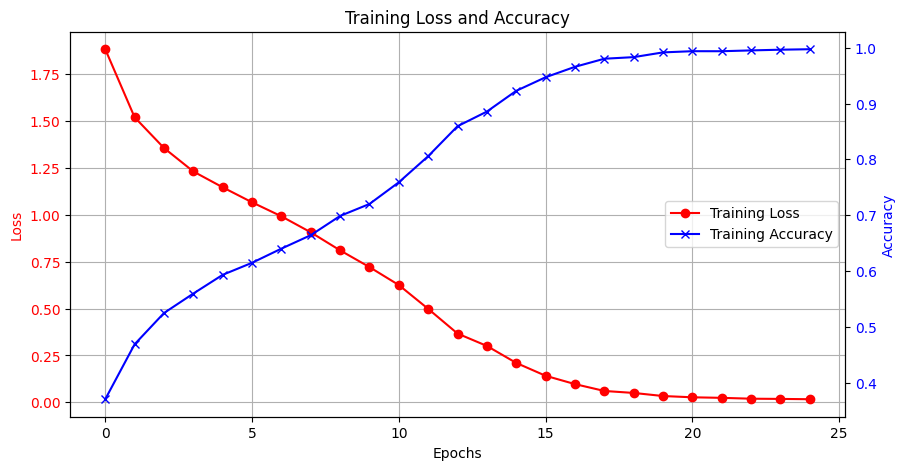

maximum GAP score achieved with 99.7228% at epoch 25


In [ ]:
import numpy as np
plot_metrics(train_loss, train_gap)
print(f"maximum GAP score achieved with {round(max(train_gap), 6) * 100}% at epoch {np.argmax(train_gap) + 1}")

In [ ]:
test_loss, test_accuracy = evaluate_model(model, test_loader, loss_fn, device)

Evaluating: 100%|██████████| 46/46 [00:03<00:00, 14.53it/s, avg_loss=0.0988, avg_acc=0.70]


 Test Loss: 1.5786286598962287, Accuracy: 0.6952380952380952


In [ ]:
save_metrics(train_loss, train_accuracy, train_gap, "/content/drive/MyDrive/cs444-final-project/project/models/baselines/train_logs/mobileNet_base_ep=24_best_model.json")